#### 1. Introduction
##### In this project, we will implement a simple fully connected neural network with TensorFlow.

###### 1.1. Example Use Case
###### There is value in being able to record prescriptions into an electronic system, such as for record keeping at the doctor's office or in a pharmacy. This can be done by a human reading the paper prescriptions and manually typing them into the system. This however is time consuming, tedious work, and requires paying for that labor. An alterative could be to develop a model capable of recognizing handwriting and entering it automatically into the system. In this experiment, we will attempt to develop a model capable of accurately recognizing handwritten digits that could be applied to this use case.

#### 2. Data Preparation
##### 2.1. Import required libraries
Python packages enable different functions, providing easy ways of manipulating data and building models. As a first step, we 'import' packages to set up our environment in a way that allows us to take advantage of different capabilities.

In [2]:
import numpy
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils # utils is a package toolkit. np_utils is a module that deal with np array. 
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras import backend as K
K.set_image_data_format('channels_first')

#### 2.2. Load the data

##### start, we read the provided data.

In [3]:
#lfixed_blurboad the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')
print("Data are Ready!!")

Data are Ready!!


In [4]:
train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.3. Explore the data structure

In [6]:
print('In the Train dataset, there are 42,000 images (data points). Each image (data point) is a 28 * 28 (= 784) matrix \nA column named label is also included to show the value of digits.')
print(train.shape)
print('\n')

print('In the Test dataset, there are 28,000 images (data points). Each image (data point) is a 28 * 28 matrix.')
print(test.shape)

In the Train dataset, there are 42,000 images (data points). Each image (data point) is a 28 * 28 (= 784) matrix 
A column named label is also included to show the value of digits.
(42000, 785)


In the Test dataset, there are 28,000 images (data points). Each image (data point) is a 28 * 28 matrix.
(28000, 784)


In [7]:
# put labels into y_train variable
y_train = train["label"]
# Drop 'label' column
x_train = train.drop(labels = ["label"],axis = 1) 
x_test = test

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

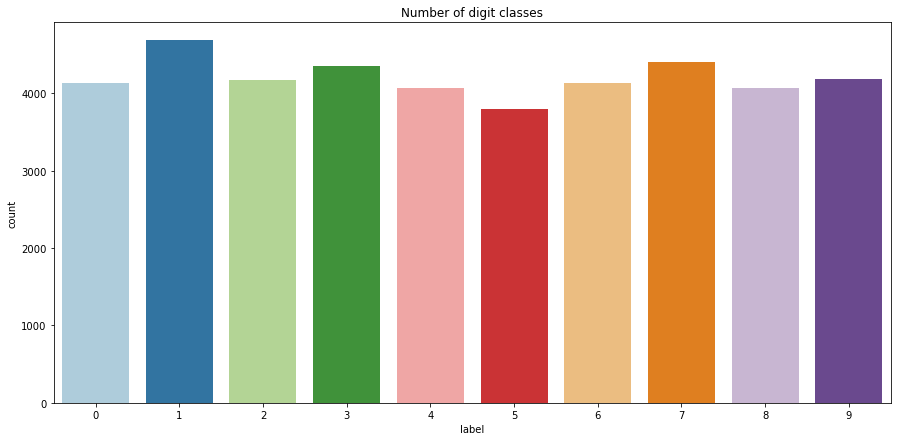

In [8]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="Paired")
plt.title("Number of digit classes")
y_train.value_counts()

### 3. Data Preprocessing

#### 3.1. Normalization
#### Why normalize?

##### Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such, it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

In [9]:
#X: Normalize the Data to [0,1]
x_train = x_train / 255
x_test  = x_test / 255

In [10]:
print('x_train shape:', x_train.shape)
print('x_test.shape', x_test.shape)

x_train shape: (42000, 784)
x_test.shape (28000, 784)


#### 3.2. Reshape
##### Train and test images (28 x 28)
##### We reshape all data to 28x28x1 3D matrices.
##### Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.

In [11]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)

x_train shape:  (42000, 28, 28, 1)
x_test shape:  (28000, 28, 28, 1)


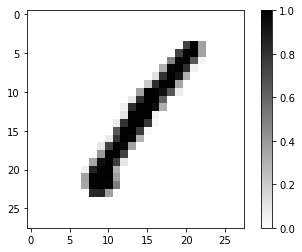

In [12]:
# Confirm that the pixel values are now between 0 and 1:
# We are going to display the first image in the dataset
plt.figure()
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

### 3.3. One Hot encoding of labels
#### Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors. A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

#### For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

In [14]:
# Label Encoding 
y_train = to_categorical(y_train, num_classes = 10)

#### 3.4. Split training and testing set
##### We split the data into training and validation sets.

##### training size is 90%.
##### testing size is 10%.

In [15]:
# fix random seed for reproducibility
seed = 43

In [16]:
# Split the train and the validation set for the fitting
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


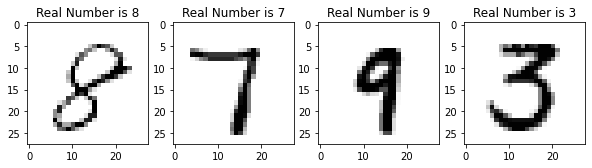

In [17]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(10, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

### Setting Up the Neural Network Architecture
#### 4.1. Design the neural network architecture
#### First, we are going to create the model framework. It is like the basic structure of a house without furniture and room layouts
#### Next we will add the flatten layer which we can input an image. This layer will flatten the image to a vector so we can pass it in to the neural network. Each pixel of the image will become an individual input that feeds in the next hidden layer
#### The next layer is a fully connected with 128 neurons. Because the neurons are all close to each other, we call it the "dense" layer. Each neuron on this layer is fully connected to the last layer. It takes the input from last layer, aggregates them and runs them through a "Relu" function. "Relu" is an activation function which will transform the aggregated result in each neuron.
#### The next layer is our output layer. The output layer has 10 neurons because we have 10 different digits in this classification problem. We feed the results from last layer to a softmax activation function to output probability-like predictions for each class. The digits with the highest probability is what the algorithm thought the digit to be.
#### The model is trained using categorical cross entropy loss function and the ADAM optimizer for gradient descent.

### 4.2. Define a baseline model
#### Now we are going to define a function to help us create a base model with the layers we dicussed.
#### Quick note: we use the "def" keyword in python to define a function. By defining a function, it increases the reusability and saves us time when we want to create the same model. So that we don't have to write out all the layers every time.

In [18]:
def baseline_model():
    # Create a model
    model = Sequential()
    # Add different layers to your model
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Train Fully Connected Neural Network for Digit Recognition on Train Set
##### With our environment set up and data loaded, we can now train, test, and evaluate our model to recognize the 10 different digits. To do this, we will use the train set and test set we created above to train our model. Running the example, the accuracy on the training and validation test is printed each epoch and at the end of the classification error rate is printed.

In [19]:
# Call the function we defined earlier to create the model
# The trainable parameters within the new model are set by the default initialization methods from Keras.
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Train the model using the picture stored in X_train and the corresponding labels stored in Y_train
history = model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_split=0.2) #verbose =1 will show the progress bar

Epoch 1/20
60/60 [==============================] - 5s 30ms/step - loss: 0.5987 - accuracy: 0.8335 - val_loss: 0.2828 - val_accuracy: 0.9172
Epoch 2/20
60/60 [==============================] - 1s 23ms/step - loss: 0.2584 - accuracy: 0.9266 - val_loss: 0.2120 - val_accuracy: 0.9392
Epoch 3/20
60/60 [==============================] - 2s 31ms/step - loss: 0.1985 - accuracy: 0.9438 - val_loss: 0.1724 - val_accuracy: 0.9501
Epoch 4/20
60/60 [==============================] - 1s 23ms/step - loss: 0.1575 - accuracy: 0.9563 - val_loss: 0.1432 - val_accuracy: 0.9586
Epoch 5/20
60/60 [==============================] - 1s 23ms/step - loss: 0.1348 - accuracy: 0.9620 - val_loss: 0.1282 - val_accuracy: 0.9643
Epoch 6/20
60/60 [==============================] - 1s 22ms/step - loss: 0.1142 - accuracy: 0.9681 - val_loss: 0.1146 - val_accuracy: 0.9663
Epoch 7/20
60/60 [==============================] - 1s 22ms/step - loss: 0.0987 - accuracy: 0.9720 - val_loss: 0.1054 - val_accuracy: 0.9697
Epoch 8/20
60

###  Evaluate the Model Performance on the Test Set
#### X_test include the new digit images the model has never seen
#### y_test include the correct labels of the test set

### 6.1. Overall Model Accuracy

In [21]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0) # scores has [loss] and [accuracy]
#Print out the error rate
print('Simple NN Accuracy: %.2f%%'% (scores[1]*100))
print("Simple NN Error:    %.2f%%"% (100-scores[1]*100))

Simple NN Accuracy: 97.62%
Simple NN Error:    2.38%


### 6.2. Plot Model Accuracy and Model Loss by Epoch

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

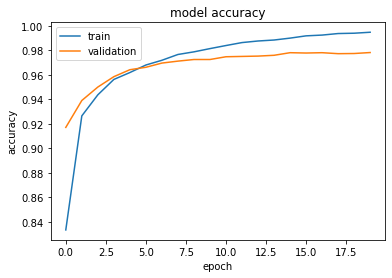

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

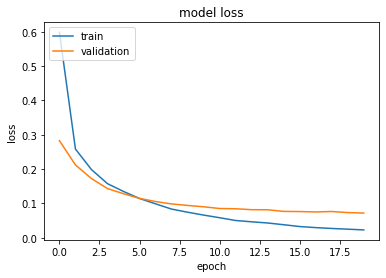

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 6.3. Display the Actual Label and the Predicted Label to check Model Performance

In [25]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = numpy.argmax(predictions_array)
    # if the algorithm makes the right prediction, it will show a blue text, 
    # otherwise show in red text
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*numpy.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = numpy.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [26]:
# Make predictions using the model. Each row in the output matrix contain probability of the image belogning to one of 10 numbers.
predictions = model.predict(X_test)

In [27]:
# Convert validation observations to one hot vectors
y_test  = numpy.argmax(y_test, axis = 1) 

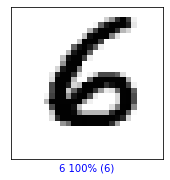

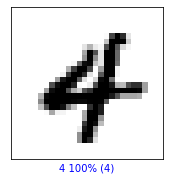

In [28]:
# Load the data and create a list of class names
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Let's examine the 1st and the 19th image to check for accuracy
image_sample_idxes = [0, 18]
for i in image_sample_idxes:
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions, y_test, X_test)

##### Time to check the ones that the algorithm missed!

In [29]:
# Time to check the ones that the algorithm missed

def check_wrong(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    predicted_label = numpy.argmax(predictions_array)
    if predicted_label == true_label:
        return False
    else: 
        return True


wrong_prediction_images_index = []
for i in range(len(predictions)):
    if check_wrong(i, predictions, y_test, X_test) == True:
        wrong_prediction_images_index.append(i)

print(wrong_prediction_images_index[:10])
print(len(wrong_prediction_images_index))

[162, 256, 262, 287, 307, 331, 391, 400, 404, 526]
100


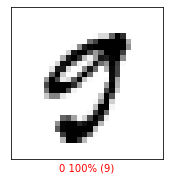

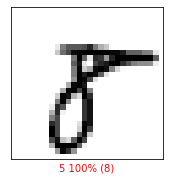

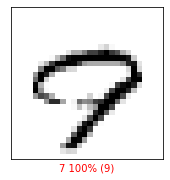

In [30]:
def plot_wrong(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    predicted_label = numpy.argmax(predictions_array)
    if predicted_label == true_label:
        pass
    else:
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(i, predictions, y_test, X_test)

# We are going to check the first 10 images to see which one the model predicted wrong

top_k = 3
for i in wrong_prediction_images_index[:top_k]:
    plot_wrong(i, predictions, y_test, X_test)

In [31]:
from ipywidgets import interact, widgets
#application
probs = model.predict(X_test) #Each row in the output matrix contain probability of the image belogning to one of 10 numbers.

predicts = model.predict(X_test).argsort()[:,-1] #To get the number in which the image belongs to, need to find out in which column the maximum probability is present.
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(X_test) - 1, description="Image index")
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(X_test[index], cmap=plt.cm.binary)
    ax1.set_title("label: %s" % class_names[y_test[index]])
    ax1.set_xlabel("predict: %s" % class_names[predicts[index]])
    ax2.bar(x=[class_names[index] for index in range(10)], height=probs[index]*100)
    plt.xticks()

interactive(children=(IntSlider(value=0, description='Image index', max=4199), Output()), _dom_classes=('widge…

### Findings and Submission

##### 7.1. Findings
##### Overall, the model turned out very accurate, attaining an accuracy of 97.55% on the test set. When examining some of the predictions the model got wrong, it is not surprising that the model had difficulties with these cases. These records with incorrect predictions are written in a way that makes them partially look like a different number.

##### For example, the model incorrectly predicted a record as an "8" in one case instead of a "3". In that particular example, the "3" had been written with the bottom half as a full enclosed circle. In another example, a "9" was mistaken as a "0" because the "9" curved in on itself so dramatically that the top and bottm were almost connecting. In some examples even a human may have trouble discerning which number was really written.

### 7.2. Submission

In [33]:
# predict the raw test data for submission
predict_x=model.predict(x_test) 
classes_x=numpy.argmax(predict_x,axis=1)

In [34]:
# submissions
sub['Label'] = classes_x
sub.to_csv("digit_recognizer.csv", index=False)
sub.head()

ValueError: Length of values (28000) does not match length of index (2556790)